___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 10 Part - 2<br><br>Multivariate Time Series Forecasting with RNN<br><br>(Time Series Generator)<br><h1>

# Dataset Info

Appliance Energy Usage: A Multivariate Time Series Forecasting Example

Experimental data used to create regression models of appliances energy use in a low energy building.
Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [70]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Recognizing and Understanding Data

In [72]:
df = pd.read_csv('/content/drive/MyDrive/energydata_complete.csv',index_col='date', parse_dates = True)

In [73]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,7.027,84.257,17.200,41.627,18.200,48.900,17.033,45.530,6.600,733.500,92.000,7.000,63.000,5.300,13.275,13.275
2016-01-11 17:10:00,60,30,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,6.833,84.063,17.200,41.560,18.200,48.863,17.067,45.560,6.483,733.600,92.000,6.667,59.167,5.200,18.606,18.606
2016-01-11 17:20:00,50,30,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,6.560,83.157,17.200,41.433,18.200,48.730,17.000,45.500,6.367,733.700,92.000,6.333,55.333,5.100,28.643,28.643
2016-01-11 17:30:00,50,40,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,6.433,83.423,17.133,41.290,18.100,48.590,17.000,45.400,6.250,733.800,92.000,6.000,51.500,5.000,45.410,45.410
2016-01-11 17:40:00,60,40,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,6.367,84.893,17.200,41.230,18.100,48.590,17.000,45.400,6.133,733.900,92.000,5.667,47.667,4.900,10.084,10.084


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.000,97.695,102.525,10.000,50.000,60.000,100.000,1080.000
lights,19735.000,3.802,7.936,0.000,0.000,0.000,0.000,70.000
T1,19735.000,21.687,1.606,16.790,20.760,21.600,22.600,26.260
RH_1,19735.000,40.260,3.979,27.023,37.333,39.657,43.067,63.360
T2,19735.000,20.341,2.193,16.100,18.790,20.000,21.500,29.857
RH_2,19735.000,40.420,4.070,20.463,37.900,40.500,43.260,56.027
T3,19735.000,22.268,2.006,17.200,20.790,22.100,23.290,29.236
RH_3,19735.000,39.243,3.255,28.767,36.900,38.530,41.760,50.163
T4,19735.000,20.855,2.043,15.100,19.530,20.667,22.100,26.200
RH_4,19735.000,39.027,4.341,27.660,35.530,38.400,42.157,51.090


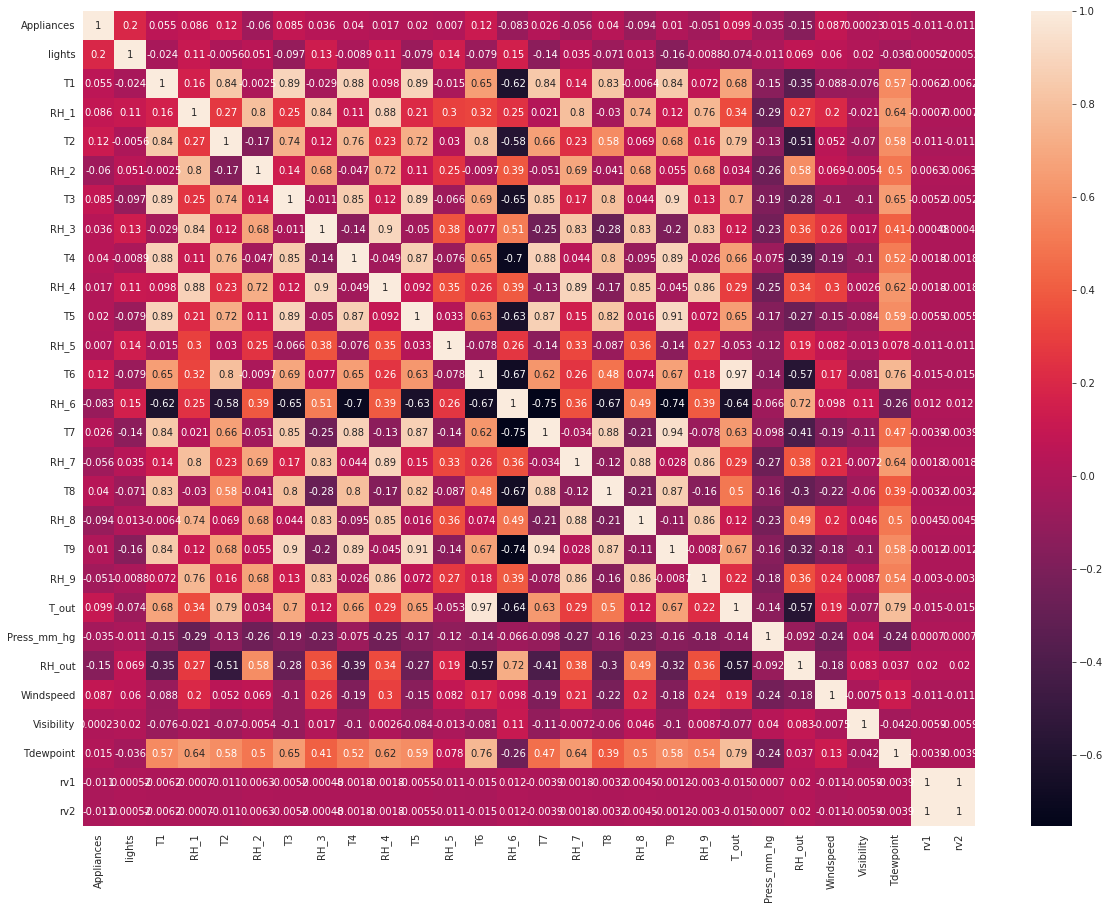

In [76]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

# Data Pre-Processing

## Feature Engineering
- Let's reduce the number of feature
- Let's resample the dataset by hours

In [77]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [78]:
df=df.rename(columns = {'T6':'T_outside', 'RH_6':'RH_outside'})
df["T_inside"] = (df["T1"] + df["T2"] + df["T3"] + df["T4"] + df["T5"] + df["T7"] + df["T8"] + df["T9"])/8
df["RH_inside"] = (df["RH_1"] + df["RH_2"] + df["RH_3"] + df["RH_4"] + df["RH_5"] + df["RH_7"] + df["RH_8"] + df["RH_9"])/8

In [79]:
drop_list = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
             'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'rv1', 'rv2']
df.drop(drop_list, axis = 1, inplace = True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T_outside    19735 non-null  float64
 3   RH_outside   19735 non-null  float64
 4   Press_mm_hg  19735 non-null  float64
 5   Windspeed    19735 non-null  float64
 6   Visibility   19735 non-null  float64
 7   Tdewpoint    19735 non-null  float64
 8   T_inside     19735 non-null  float64
 9   RH_inside    19735 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.7 MB


In [81]:
df_a = df[["Appliances", "lights"]]
df_b = df.drop(["Appliances", "lights"], axis = 1)

In [82]:
df_a = df_a.resample("H").sum() # convert to hourly data, Index must be date data
df_b = df_b.resample("H").mean()

In [83]:
df = pd.concat([df_a, df_b], axis =1)
df.head()

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,330,210,6.587,84.260,733.750,6.167,53.417,5.050,18.415,46.555
2016-01-11 18:00:00,1060,310,6.180,87.204,734.267,5.417,40.000,4.658,18.408,46.520
2016-01-11 19:00:00,1040,150,5.857,88.131,734.792,6.000,40.000,4.392,18.686,48.665
2016-01-11 20:00:00,750,210,5.469,86.934,735.283,6.000,40.000,4.017,18.941,50.356
2016-01-11 21:00:00,620,140,5.579,86.129,735.567,6.000,40.000,3.817,19.254,48.977


In [84]:
df.shape

(3290, 10)

Let's also round off the data, to one decimal point precision, otherwise this may cause issues with our network (we will also normalize the data anyways, so this level of precision isn't useful to us)

In [85]:
df = df.round(2)

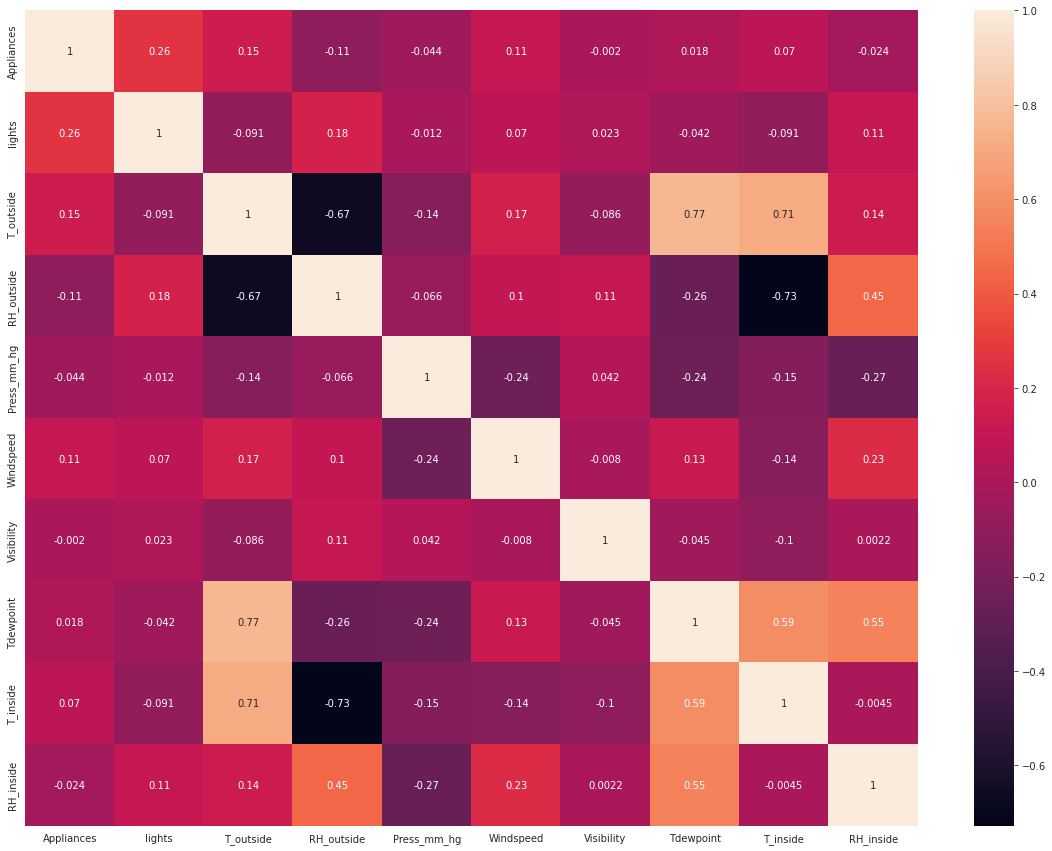

In [86]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

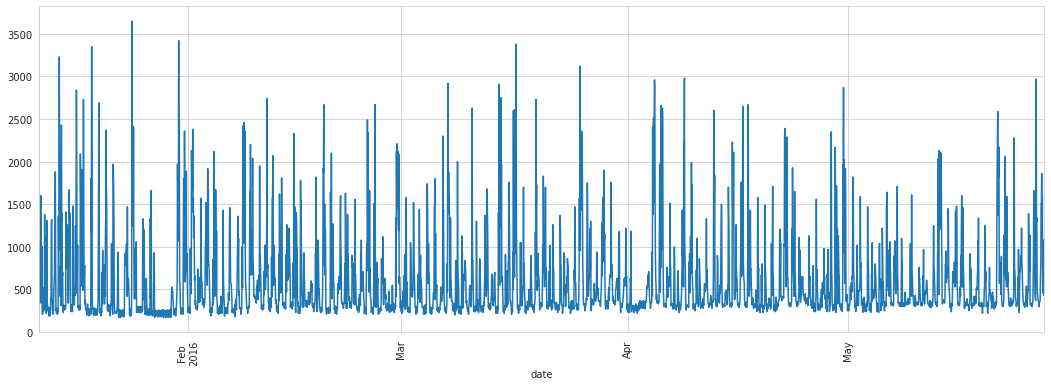

In [87]:
df['Appliances'].plot(figsize=(18,6))
plt.xticks(rotation=90);

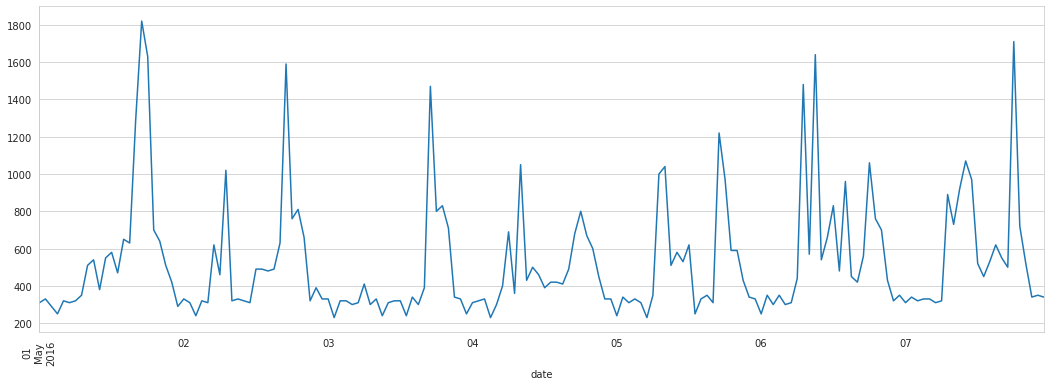

In [88]:
df['Appliances'].loc["2016-05-01 00:00:00" : "2016-05-07 23:00:00"].plot(figsize=(18,6))
plt.xticks(rotation=90);

## Train Test Split

In [89]:
len(df)

3290

In [90]:
# How many rows per day?
24

24

In [91]:
test_days = 7

In [92]:
test_ind = test_days*24

In [93]:
test_ind

168

In [94]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [95]:
train.shape, test.shape

((3122, 10), (168, 10))

## Scaling

In [96]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [97]:
scaler = MinMaxScaler()

In [98]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Modelling

In [99]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [100]:
length = 24 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [101]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(3122, 3098, 168, 144)

In [102]:
n_features = train_scaled.shape[1]

In [103]:
model = Sequential()

model.add(LSTM(100,input_shape=(length, n_features)))

model.add(Dense(n_features))

model.compile(optimizer='adam', loss='mse')

In [104]:
early_stop = EarlyStopping(monitor='val_loss',patience=3, restore_best_weights = True)

In [105]:
model.fit(x = generator,
          epochs=20,
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
3098/3098 [==============================] - 23s 7ms/step - loss: 0.0088 - val_loss: 0.0056
Epoch 2/20
3098/3098 [==============================] - 14s 5ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 3/20
3098/3098 [==============================] - 14s 5ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 4/20
3098/3098 [==============================] - 14s 5ms/step - loss: 0.0042 - val_loss: 0.0052
Epoch 5/20
3098/3098 [==============================] - 18s 6ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 6/20
3098/3098 [==============================] - 19s 6ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 7/20
3098/3098 [==============================] - 14s 5ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 8/20
3098/3098 [==============================] - 14s 5ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 9/20
3098/3098 [==============================] - 14s 5ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 10/20
3098/3098 [==============================] - 14s 5ms/step - l

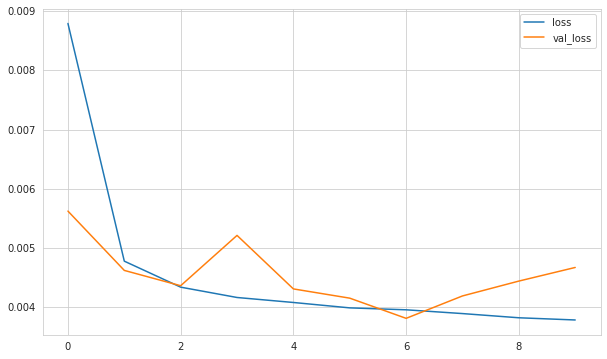

In [106]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluation on Test Data

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [108]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [109]:
train_scaled

array([[0.04597701, 0.67741935, 0.36747872, ..., 0.53060285, 0.24072217,
        0.72111369],
       [0.25574713, 1.        , 0.35544467, ..., 0.51265532, 0.23971916,
        0.71972158],
       [0.25      , 0.48387097, 0.34605225, ..., 0.5002301 , 0.26780341,
        0.81948956],
       ...,
       [0.03448276, 0.        , 0.79189903, ..., 0.86746434, 0.72016048,
        0.65614849],
       [0.08045977, 0.        , 0.78544174, ..., 0.81316153, 0.73420261,
        0.69605568],
       [0.0862069 , 0.03225806, 0.76342824, ..., 0.75977911, 0.75025075,
        0.80510441]])

In [110]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [111]:
predictions_scaled

[array([0.10628182, 0.01876542, 0.7129506 , 0.04641677, 0.65854985,
        0.3146876 , 0.5633629 , 0.73338354, 0.7274713 , 0.7655801 ],
       dtype=float32),
 array([0.11262207, 0.00785364, 0.66936857, 0.12062605, 0.6515663 ,
        0.28662014, 0.52126104, 0.72295713, 0.71072775, 0.7223483 ],
       dtype=float32),
 array([0.1167255 , 0.00805728, 0.63714236, 0.18466207, 0.6502642 ,
        0.26453182, 0.5094309 , 0.71620923, 0.7010523 , 0.7055991 ],
       dtype=float32),
 array([0.11135983, 0.01132125, 0.6086543 , 0.23616701, 0.64865446,
        0.2441709 , 0.50103754, 0.7082484 , 0.69331205, 0.6972065 ],
       dtype=float32),
 array([0.09940879, 0.01242361, 0.58458126, 0.27562505, 0.6468785 ,
        0.22525433, 0.49308646, 0.7001615 , 0.6865539 , 0.68938303],
       dtype=float32),
 array([0.08547002, 0.01005983, 0.5662998 , 0.30392423, 0.6452365 ,
        0.2088483 , 0.4863674 , 0.692526  , 0.68053883, 0.6803148 ],
       dtype=float32),
 array([0.07279712, 0.00516332, 0.554609

In [112]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -2.8704786574298597 
mae: 0.09655879118610064 
mse: 0.019024723872914612 
rmse: 0.1379301412778027


## Inverse Transformation and Comparing

In [113]:
predictions = scaler.inverse_transform(predictions_scaled)
predictions = pd.DataFrame(data=predictions,columns=test.columns)
predictions

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
0,539.861,5.817,18.360,5.591,757.619,4.379,37.802,9.456,23.273,47.508
1,561.925,2.435,16.875,12.930,757.319,4.026,35.083,9.230,23.106,46.577
2,576.205,2.498,15.777,19.263,757.263,3.748,34.319,9.083,23.009,46.216
3,557.532,3.510,14.807,24.357,757.194,3.492,33.777,8.910,22.932,46.035
4,515.943,3.851,13.987,28.259,757.118,3.254,33.264,8.735,22.865,45.866
5,467.436,3.119,13.364,31.058,757.048,3.047,32.830,8.569,22.805,45.671
6,423.334,1.601,12.966,32.810,756.988,2.883,32.510,8.421,22.755,45.450
7,389.556,-0.222,12.797,33.561,756.941,2.763,32.300,8.297,22.721,45.209
8,368.546,-1.919,12.849,33.356,756.907,2.686,32.183,8.203,22.708,44.950
9,360.815,-3.193,13.102,32.249,756.888,2.647,32.143,8.137,22.717,44.669


In [114]:
test_new = test[:length]

In [115]:
test_new

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-05-20 19:00:00,390,0,20.080,1.390,758.040,4.580,40.000,9.260,23.440,45.860
2016-05-20 20:00:00,420,0,16.120,10.870,758.100,3.170,40.000,9.120,23.290,44.830
2016-05-20 21:00:00,390,10,14.000,26.340,758.180,1.580,40.000,10.330,23.180,44.700
2016-05-20 22:00:00,320,10,13.100,34.750,758.300,1.000,40.000,10.840,23.140,45.040
2016-05-20 23:00:00,270,0,13.220,42.260,758.170,1.420,35.420,11.610,23.090,45.380
2016-05-21 00:00:00,290,0,13.040,47.210,757.880,2.420,28.580,12.640,23.050,45.670
2016-05-21 01:00:00,310,0,13.240,50.420,757.490,3.420,33.000,12.660,23.020,45.800
2016-05-21 02:00:00,340,0,12.950,50.820,757.080,4.000,40.000,12.600,23.000,45.870
2016-05-21 03:00:00,290,0,12.390,51.640,756.780,4.000,35.420,12.480,22.980,45.930


In [116]:
for i in test_new.columns:
    print(i)
    eval_metrics(test_new[i], predictions[i])
    print("--"*15)

Appliances
r2_score: -0.09353755404922248 
mae: 520.7926334564885 
mse: 649907.4041470839 
rmse: 806.1683472743666
------------------------------
lights
r2_score: 0.34129399792385273 
mae: 3.6191853791630515 
mse: 21.49943201220758 
rmse: 4.636747999644533
------------------------------
T_outside
r2_score: 0.3800390144070259 
mae: 3.092531787430246 
mse: 16.146953507747778 
rmse: 4.018327202673742
------------------------------
RH_outside
r2_score: 0.6323910333821243 
mae: 10.365914667913069 
mse: 183.4199119966346 
rmse: 13.543260759382676
------------------------------
Press_mm_hg
r2_score: -0.017891743456970755 
mae: 1.1156396563847721 
mse: 2.023584160398973 
rmse: 1.422527384762407
------------------------------
Windspeed
r2_score: -0.49930276992559763 
mae: 1.9977453002209467 
mse: 5.282893003055219 
rmse: 2.2984544813972754
------------------------------
Visibility
r2_score: 0.18751014932551402 
mae: 4.960260630249976 
mse: 28.58846409648911 
rmse: 5.346818128241235
------------

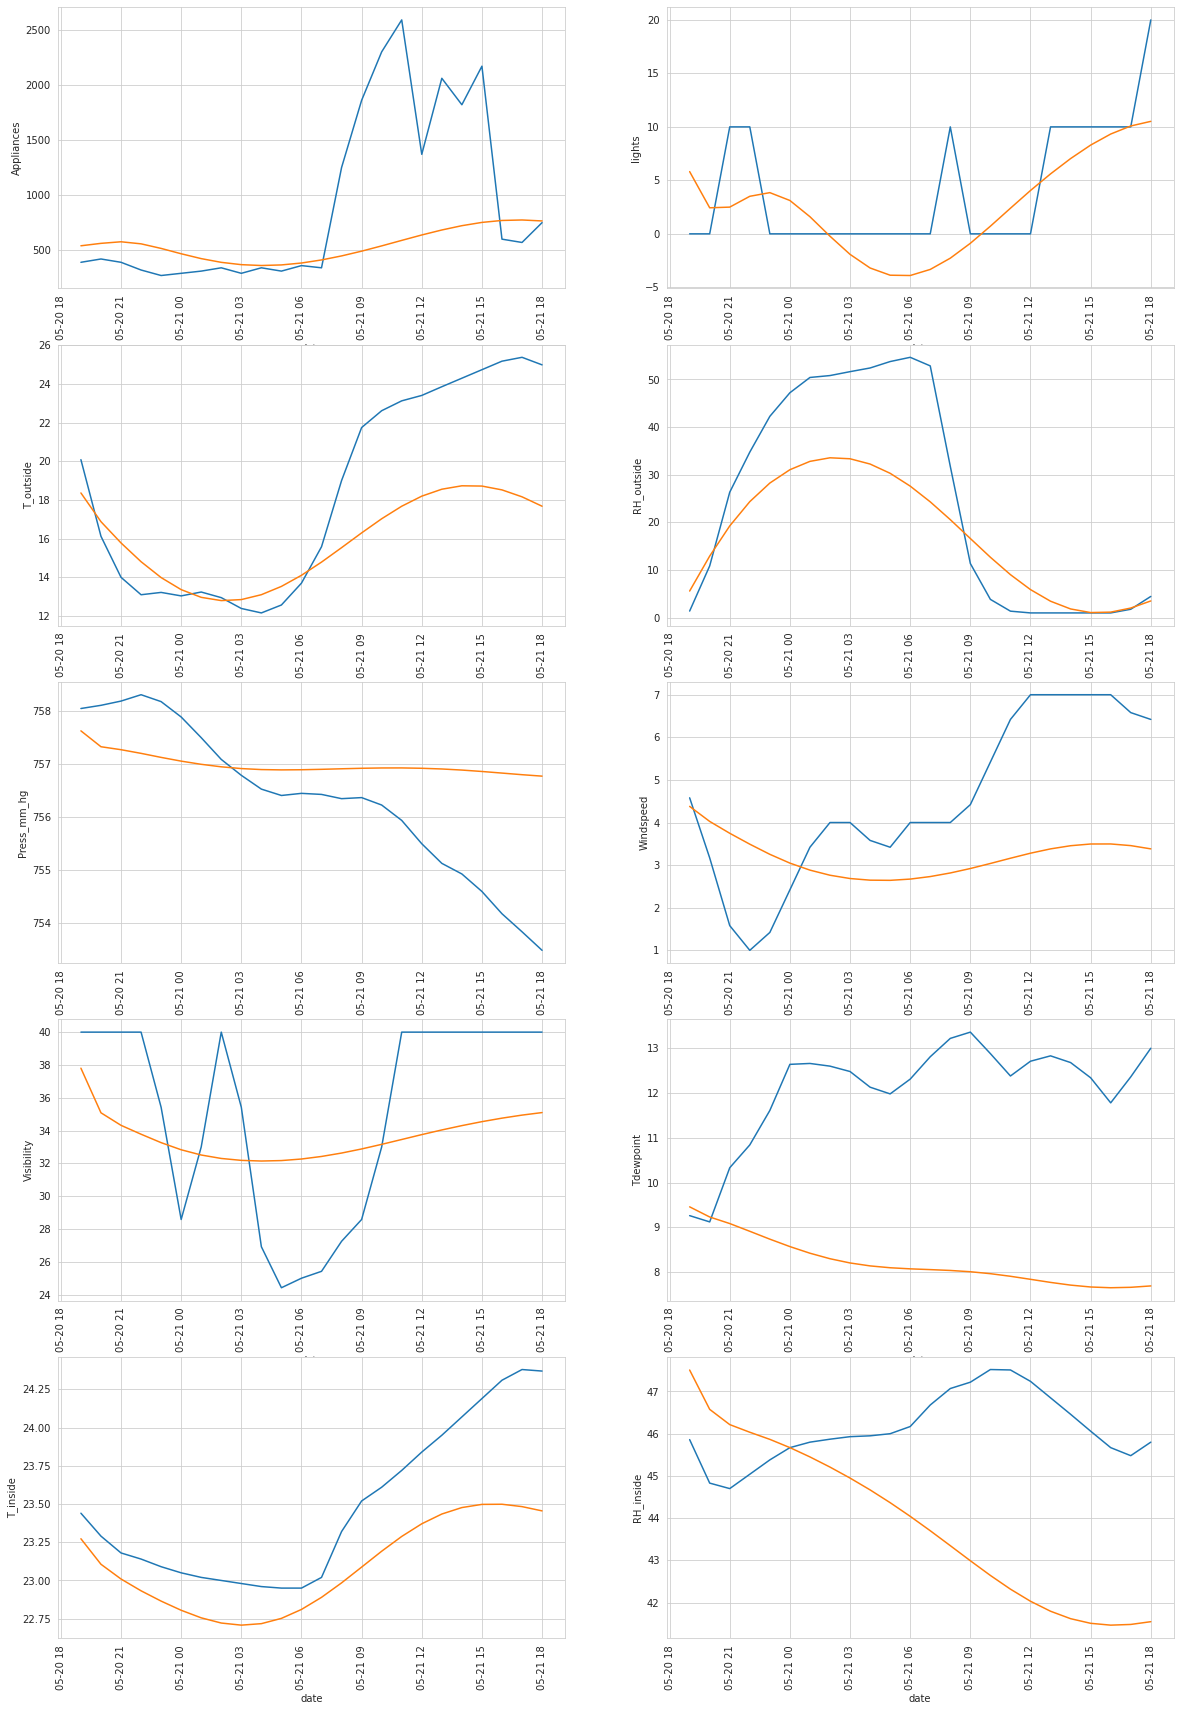

In [117]:
index = 0
plt.figure(figsize = (20, 30))

for i in test.columns:
    index += 1
    test_eva = pd.DataFrame(test_new[i])
    test_eva["predictions"] = predictions[i].values
    plt.subplot(5, 2, index)
    sns.lineplot(x = test_eva.index, y = test_eva[i])
    sns.lineplot(x = test_eva.index, y = test_eva.predictions)
    plt.xticks(rotation=90);

In [118]:
compare = test_new[["Appliances"]]
compare["prediction"] = predictions["Appliances"].values
compare

,Appliances,prediction
date,,
2016-05-20 19:00:00,390,539.861
2016-05-20 20:00:00,420,561.925
2016-05-20 21:00:00,390,576.205
2016-05-20 22:00:00,320,557.532
2016-05-20 23:00:00,270,515.943
2016-05-21 00:00:00,290,467.436
2016-05-21 01:00:00,310,423.334
2016-05-21 02:00:00,340,389.556
2016-05-21 03:00:00,290,368.546


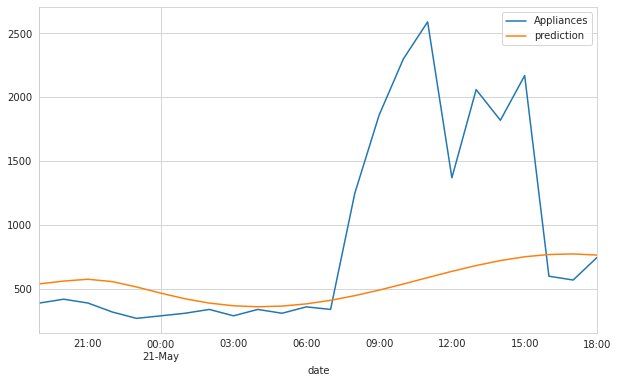

In [119]:
compare.plot();

# Retrain and Forecasting

In [120]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [121]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [122]:
model = Sequential()

model.add(LSTM(100,input_shape=(length, n_features)))

model.add(Dense(n_features))

model.compile(optimizer='adam', loss='mse')

In [123]:
model.fit(x = generator, epochs=15)

Epoch 1/15
3266/3266 [==============================] - 16s 4ms/step - loss: 0.0086
Epoch 2/15
3266/3266 [==============================] - 14s 4ms/step - loss: 0.0047
Epoch 3/15
3266/3266 [==============================] - 15s 5ms/step - loss: 0.0043
Epoch 4/15
3266/3266 [==============================] - 14s 4ms/step - loss: 0.0042
Epoch 5/15
3266/3266 [==============================] - 14s 4ms/step - loss: 0.0041
Epoch 6/15
3266/3266 [==============================] - 14s 4ms/step - loss: 0.0040
Epoch 7/15
3266/3266 [==============================] - 14s 4ms/step - loss: 0.0039
Epoch 8/15
3266/3266 [==============================] - 14s 4ms/step - loss: 0.0039
Epoch 9/15
3266/3266 [==============================] - 14s 4ms/step - loss: 0.0038
Epoch 10/15
3266/3266 [==============================] - 14s 4ms/step - loss: 0.0038
Epoch 11/15
3266/3266 [==============================] - 14s 4ms/step - loss: 0.0037
Epoch 12/15
3266/3266 [==============================] - 14s 4ms/step - lo

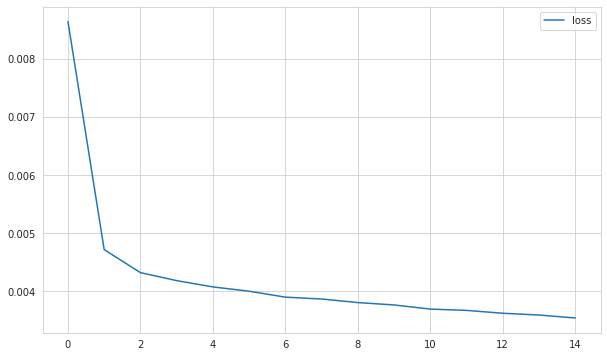

In [124]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [125]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [126]:
forecast = full_scaler.inverse_transform(predictions_scaled)
forecast

array([[ 5.39860723e+02,  5.81728011e+00,  1.83602265e+01,
         5.59061899e+00,  7.57618617e+02,  4.37877013e+00,
         3.76185883e+01,  9.45642424e+00,  2.32728888e+01,
         4.75082515e+01],
       [ 5.61924794e+02,  2.43462963e+00,  1.68753870e+01,
         1.29299161e+01,  7.57319164e+02,  4.02568136e+00,
         3.48819674e+01,  9.22985853e+00,  2.31059557e+01,
         4.65766053e+01],
       [ 5.76204755e+02,  2.49775723e+00,  1.57774402e+01,
         1.92630791e+01,  7.57263329e+02,  3.74781031e+00,
         3.41130075e+01,  9.08322663e+00,  2.30094915e+01,
         4.62156612e+01],
       [ 5.57532225e+02,  3.50958790e+00,  1.48068527e+01,
         2.43569176e+01,  7.57194303e+02,  3.49166997e+00,
         3.35674400e+01,  8.91023723e+00,  2.29323211e+01,
         4.60348000e+01],
       [ 5.15942591e+02,  3.85131891e+00,  1.39866834e+01,
         2.82593175e+01,  7.57118149e+02,  3.25369943e+00,
         3.30506197e+01,  8.73450976e+00,  2.28649423e+01,
         4.

In [127]:
df

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,330,210,6.590,84.260,733.750,6.170,53.420,5.050,18.420,46.550
2016-01-11 18:00:00,1060,310,6.180,87.200,734.270,5.420,40.000,4.660,18.410,46.520
2016-01-11 19:00:00,1040,150,5.860,88.130,734.790,6.000,40.000,4.390,18.690,48.670
2016-01-11 20:00:00,750,210,5.470,86.930,735.280,6.000,40.000,4.020,18.940,50.360
2016-01-11 21:00:00,620,140,5.580,86.130,735.570,6.000,40.000,3.820,19.250,48.980
...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,610,10,25.570,1.000,755.800,2.000,21.580,13.480,24.850,45.890
2016-05-27 15:00:00,460,0,26.280,1.000,755.670,2.000,21.830,13.260,24.840,45.420
2016-05-27 16:00:00,810,0,26.140,1.000,755.380,2.420,22.580,13.280,24.890,45.990


In [128]:
forecast_index = pd.date_range(start = '2016-05-27 19:00:00', periods = length, freq = 'H')
forecast_index

DatetimeIndex(['2016-05-27 19:00:00', '2016-05-27 20:00:00',
               '2016-05-27 21:00:00', '2016-05-27 22:00:00',
               '2016-05-27 23:00:00', '2016-05-28 00:00:00',
               '2016-05-28 01:00:00', '2016-05-28 02:00:00',
               '2016-05-28 03:00:00', '2016-05-28 04:00:00',
               '2016-05-28 05:00:00', '2016-05-28 06:00:00',
               '2016-05-28 07:00:00', '2016-05-28 08:00:00',
               '2016-05-28 09:00:00', '2016-05-28 10:00:00',
               '2016-05-28 11:00:00', '2016-05-28 12:00:00',
               '2016-05-28 13:00:00', '2016-05-28 14:00:00',
               '2016-05-28 15:00:00', '2016-05-28 16:00:00',
               '2016-05-28 17:00:00', '2016-05-28 18:00:00'],
              dtype='datetime64[ns]', freq='H')

In [129]:
forecast_df = pd.DataFrame(data = forecast[:,:1], index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2016-05-27 19:00:00,539.861
2016-05-27 20:00:00,561.925
2016-05-27 21:00:00,576.205
2016-05-27 22:00:00,557.532
2016-05-27 23:00:00,515.943
2016-05-28 00:00:00,467.436
2016-05-28 01:00:00,423.334
2016-05-28 02:00:00,389.556
2016-05-28 03:00:00,368.546
2016-05-28 04:00:00,360.815


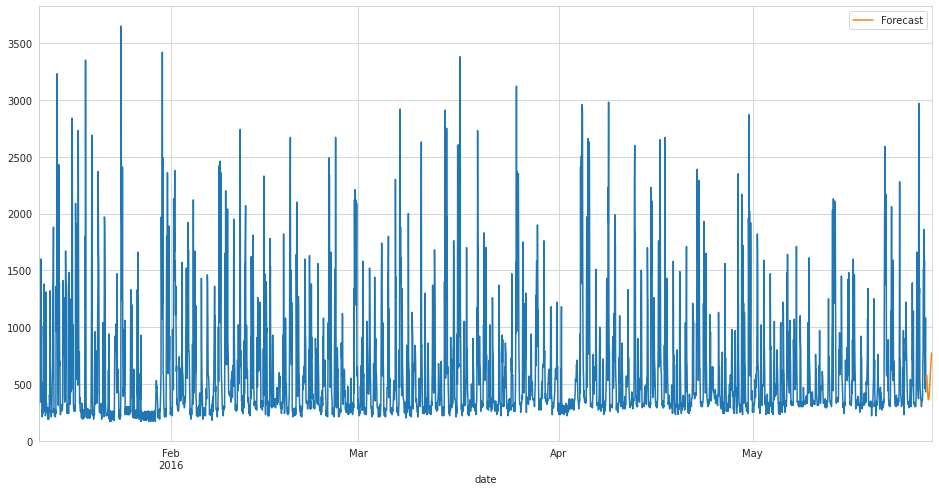

In [130]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(406722.0, 406794.0)

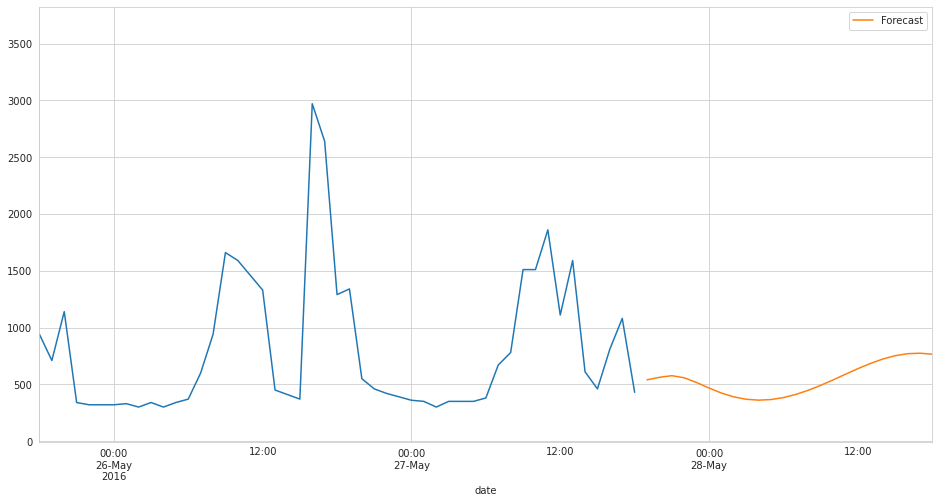

In [131]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim("2016-05-25 18:00:00", "2016-05-28 18:00:00")

<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>